In [3]:
!pip install gluonnlp pandas tqdm   
!pip install mxnet
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp39-cp39-linux_x86_64.whl size=680519 sha256=7b3e2e33ac6c99f0e2eb55c7f09becc546a5b5e216f98bcefe3530c1c1460dc8
  Stored in directory: /root/.cache/pip/wheels/47/17/70/b257bc53879a458c4bfcc900e89271aa8b4f19366a54bd2455
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-g1r2zk8w/kobert-tokenizer_1c2c201a01c44905bb51670bd42a92b3
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-g1r2zk8w/kobert-tokenizer_1c2c201a01c44905bb51670bd42a92b3
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4645 sha256=f15d7ac5f49b21f37b9581c2682d23381165bbe65c81d2b97aad28acf1a190a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-zu5yc983/wheels/64/c4/82/d70d864682468fad0bf8269b0dfd88daf48f209be4c8ade164
Successfully built kobert_tokenizer


In [5]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-aubqi3b9
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-aubqi3b9
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
from kobert_tokenizer import KoBERTTokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_pytorch_kobert_model()

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/244 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/432 [00:00<?, ?B/s]

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [7]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

#GPU 사용 시
device = torch.device("cuda:0")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/data/train.csv'
data = pd.read_csv(data_path)

In [11]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

data = data.replace(label_dict)
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [12]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer,vocab, max_len,
                 pad, pair):
   
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
         

    def __len__(self):
        return (len(self.labels))

In [13]:
# Setting parameters
max_len = 200
batch_size = 64
warmup_ratio = 0.1
num_epochs = 30
max_grad_norm = 1
log_interval = 10
learning_rate =  5e-5

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, 
    random_state=2023, stratify=data['label'])

In [15]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, 
    random_state=2023, stratify=y_train)

In [16]:
dataset_train = []
for sen, label in zip(x_train, y_train):
    dataset_train.append((sen, str(label)))
dataset_val = []
for sen, label in zip(x_val, y_val):
    dataset_val.append((sen, str(label)))
dataset_test = []
for sen, label in zip(x_test, y_test):
    dataset_test.append((sen, str(label)))

In [17]:
tk = tokenizer.tokenize
data_train = BERTDataset(dataset_train, 0, 1, tk, vocab, max_len, True, False)
data_val = BERTDataset(dataset_val, 0, 1, tk, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tk, vocab, max_len, True, False)

In [18]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [19]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        else:
            out = pooler
        return self.classifier(out)

In [20]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel, dr_rate=0.7).to(device)
 
#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 대표적인 loss func

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [21]:
# Early Stopping
best_loss = 10 ** 9 # 매우 큰 값으로 초기값 가정
best_acc = 0
patience_limit = 7 # 몇 번의 epoch까지 지켜볼지를 결정
patience_check = 0 # 현재 몇 epoch 연속으로 loss 개선이 안되는지를 기록

train_history=[]
val_history=[]
train_loss_history=[]
val_loss_history=[]
for e in range(num_epochs):
    train_acc, train_loss = 0.0, 0.0
    val_acc, val_loss = 0.0, 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        train_loss += loss.data.cpu().numpy()
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            # train_history.append(train_acc / (batch_id+1))
            # train_loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    print("epoch {} train loss {}".format(e+1, train_loss / (batch_id+1)))
    train_history.append(train_acc / (batch_id+1))
    train_loss_history.append(train_loss / (batch_id+1))
    
    model.eval()
    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length= valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)
            val_acc += calc_accuracy(out, label)
            val_loss += loss_fn(out, label).data.cpu().numpy()
    print("epoch {} val acc {}".format(e+1, val_acc / (batch_id+1)))
    print("epoch {} val loss {}".format(e+1, val_loss / (batch_id+1)))
    val_history.append(val_acc / (batch_id+1))
    val_loss_history.append(val_loss / (batch_id+1))

    ### early stopping 여부를 체크하는 부분 ###
    if val_acc < best_acc: # acc 개선되지 않은 경우
        patience_check += 1

        if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
            break

    else: # acc가 개선된 경우
        best_acc = val_acc
        patience_check = 0
    # ### early stopping 여부를 체크하는 부분 ###
    # if val_loss > best_loss: # loss가 개선되지 않은 경우
    #     patience_check += 1

    #     if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
    #         break

    # else: # loss가 개선된 경우
    #     best_loss = val_loss
    #     patience_check = 0

  0%|          | 0/42 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.7907721996307373 train acc 0.203125
epoch 1 batch id 11 loss 1.8470609188079834 train acc 0.1846590909090909
epoch 1 batch id 21 loss 1.6315432786941528 train acc 0.22247023809523808
epoch 1 batch id 31 loss 1.5255520343780518 train acc 0.2620967741935484
epoch 1 batch id 41 loss 1.339197039604187 train acc 0.3048780487804878
epoch 1 train acc 0.3114617940199335
epoch 1 train loss 1.573253109341576


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 1 val acc 0.4395579268292683
epoch 1 val loss 1.3168995380401611


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.3488149642944336 train acc 0.421875
epoch 2 batch id 11 loss 1.4145265817642212 train acc 0.4161931818181818
epoch 2 batch id 21 loss 1.2333793640136719 train acc 0.43973214285714285
epoch 2 batch id 31 loss 1.3349758386611938 train acc 0.4742943548387097
epoch 2 batch id 41 loss 1.1382689476013184 train acc 0.49771341463414637
epoch 2 train acc 0.5035818106312293
epoch 2 train loss 1.2244397870131902


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 2 val acc 0.7064786585365853
epoch 2 val loss 0.9549116730690003


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.8718201518058777 train acc 0.796875
epoch 3 batch id 11 loss 0.9172958135604858 train acc 0.6463068181818182
epoch 3 batch id 21 loss 0.8539542555809021 train acc 0.6555059523809523
epoch 3 batch id 31 loss 0.9013272523880005 train acc 0.6869959677419355
epoch 3 batch id 41 loss 0.5712507367134094 train acc 0.7084603658536586
epoch 3 train acc 0.712079526578073
epoch 3 train loss 0.8259450779074714


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 3 val acc 0.741234756097561
epoch 3 val loss 0.7133168458938599


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.4728674292564392 train acc 0.859375
epoch 4 batch id 11 loss 0.6488296389579773 train acc 0.7670454545454546
epoch 4 batch id 21 loss 0.3323095142841339 train acc 0.7983630952380952
epoch 4 batch id 31 loss 0.6076844930648804 train acc 0.8225806451612904
epoch 4 batch id 41 loss 0.25045573711395264 train acc 0.8414634146341463
epoch 4 train acc 0.843576965669989
epoch 4 train loss 0.5013452551904178


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 4 val acc 0.7849847560975609
epoch 4 val loss 0.5940313696861267


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.28984200954437256 train acc 0.90625
epoch 5 batch id 11 loss 0.422999769449234 train acc 0.8778409090909091
epoch 5 batch id 21 loss 0.42266252636909485 train acc 0.8601190476190477
epoch 5 batch id 31 loss 0.30425137281417847 train acc 0.860383064516129
epoch 5 batch id 41 loss 0.20831064879894257 train acc 0.8673780487804879
epoch 5 train acc 0.8694282945736435
epoch 5 train loss 0.3888979186969144


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 5 val acc 0.803734756097561
epoch 5 val loss 0.6645893394947052


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.20916301012039185 train acc 0.953125
epoch 6 batch id 11 loss 0.3407910168170929 train acc 0.9161931818181818
epoch 6 batch id 21 loss 0.1409594714641571 train acc 0.9144345238095238
epoch 6 batch id 31 loss 0.19312098622322083 train acc 0.9183467741935484
epoch 6 batch id 41 loss 0.09316401928663254 train acc 0.9241615853658537
epoch 6 train acc 0.9254135520487264
epoch 6 train loss 0.260887108565796


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 6 val acc 0.7894817073170731
epoch 6 val loss 0.8266013383865356


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.3368728458881378 train acc 0.890625
epoch 7 batch id 11 loss 0.4007653594017029 train acc 0.8693181818181818
epoch 7 batch id 21 loss 0.3166730999946594 train acc 0.8876488095238095
epoch 7 batch id 31 loss 0.2775702476501465 train acc 0.9047379032258065
epoch 7 batch id 41 loss 0.11155898123979568 train acc 0.9134908536585366
epoch 7 train acc 0.913889465669989
epoch 7 train loss 0.2765028854565961


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 7 val acc 0.8176067073170732
epoch 7 val loss 0.670585572719574


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.11593223363161087 train acc 0.96875
epoch 8 batch id 11 loss 0.26192739605903625 train acc 0.9403409090909091
epoch 8 batch id 21 loss 0.08866692334413528 train acc 0.9486607142857143
epoch 8 batch id 31 loss 0.10356025397777557 train acc 0.9536290322580645
epoch 8 batch id 41 loss 0.047953005880117416 train acc 0.9576981707317073
epoch 8 train acc 0.9575979374307864
epoch 8 train loss 0.15168856709663356


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 8 val acc 0.8016006097560975
epoch 8 val loss 0.7772437930107117


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.16168642044067383 train acc 0.921875
epoch 9 batch id 11 loss 0.15886308252811432 train acc 0.9573863636363636
epoch 9 batch id 21 loss 0.03234756365418434 train acc 0.9627976190476191
epoch 9 batch id 31 loss 0.23639822006225586 train acc 0.9682459677419355
epoch 9 batch id 41 loss 0.05859808996319771 train acc 0.9653201219512195
epoch 9 train acc 0.9661458333333334
epoch 9 train loss 0.11948594508603924


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 9 val acc 0.8238567073170732
epoch 9 val loss 0.7202201366424561


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.026259375736117363 train acc 1.0
epoch 10 batch id 11 loss 0.2065737247467041 train acc 0.9630681818181818
epoch 10 batch id 21 loss 0.01957162842154503 train acc 0.9694940476190477
epoch 10 batch id 31 loss 0.10325111448764801 train acc 0.9722782258064516
epoch 10 batch id 41 loss 0.016266191378235817 train acc 0.975609756097561
epoch 10 train acc 0.9756367663344407
epoch 10 train loss 0.09623816241288469


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 10 val acc 0.8096036585365853
epoch 10 val loss 0.7734132051467896


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.012551934458315372 train acc 1.0
epoch 11 batch id 11 loss 0.09524346888065338 train acc 0.984375
epoch 11 batch id 21 loss 0.011376362293958664 train acc 0.9880952380952381
epoch 11 batch id 31 loss 0.026033924892544746 train acc 0.9873991935483871
epoch 11 batch id 41 loss 0.017376787960529327 train acc 0.9866615853658537
epoch 11 train acc 0.9869791666666666
epoch 11 train loss 0.06535775105779369


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 11 val acc 0.8179878048780488
epoch 11 val loss 0.811742502450943


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.00867060199379921 train acc 1.0
epoch 12 batch id 11 loss 0.04405350610613823 train acc 0.9886363636363636
epoch 12 batch id 21 loss 0.007956638932228088 train acc 0.9918154761904762
epoch 12 batch id 31 loss 0.012397180311381817 train acc 0.9894153225806451
epoch 12 batch id 41 loss 0.006503450218588114 train acc 0.989329268292683
epoch 12 train acc 0.9895833333333334
epoch 12 train loss 0.03872422971540973


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 12 val acc 0.8252286585365853
epoch 12 val loss 0.8658947944641113


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.006857050117105246 train acc 1.0
epoch 13 batch id 11 loss 0.09464506059885025 train acc 0.9900568181818182
epoch 13 batch id 21 loss 0.00758194737136364 train acc 0.9910714285714286
epoch 13 batch id 31 loss 0.008472321555018425 train acc 0.9929435483870968
epoch 13 batch id 41 loss 0.006441430654376745 train acc 0.9935213414634146
epoch 13 train acc 0.9936755952380952
epoch 13 train loss 0.03219949645877239


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 13 val acc 0.8346036585365854
epoch 13 val loss 0.9001968622207641


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.00600695563480258 train acc 1.0
epoch 14 batch id 11 loss 0.0398489385843277 train acc 0.9886363636363636
epoch 14 batch id 21 loss 0.005363323260098696 train acc 0.9910714285714286
epoch 14 batch id 31 loss 0.007241649087518454 train acc 0.9934475806451613
epoch 14 batch id 41 loss 0.004263037350028753 train acc 0.9942835365853658
epoch 14 train acc 0.9944196428571429
epoch 14 train loss 0.021722787475612546


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 14 val acc 0.838109756097561
epoch 14 val loss 0.9790623307228088


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.005487863905727863 train acc 1.0
epoch 15 batch id 11 loss 0.0061867558397352695 train acc 0.9957386363636364
epoch 15 batch id 21 loss 0.0038795636501163244 train acc 0.9977678571428571
epoch 15 batch id 31 loss 0.003467748174443841 train acc 0.9979838709677419
epoch 15 batch id 41 loss 0.0031925372313708067 train acc 0.9977134146341463
epoch 15 train acc 0.9977678571428571
epoch 15 train loss 0.012106213408211866


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 15 val acc 0.8398628048780488
epoch 15 val loss 0.9543830871582031


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 16 batch id 1 loss 0.003288546111434698 train acc 1.0
epoch 16 batch id 11 loss 0.00531117245554924 train acc 0.9957386363636364
epoch 16 batch id 21 loss 0.005437708459794521 train acc 0.9977678571428571
epoch 16 batch id 31 loss 0.006641753483563662 train acc 0.9979838709677419
epoch 16 batch id 41 loss 0.004272211343050003 train acc 0.9977134146341463
epoch 16 train acc 0.9977678571428571
epoch 16 train loss 0.011552092236732798


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 16 val acc 0.8123475609756097
epoch 16 val loss 1.052321684360504


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 17 batch id 1 loss 0.003868551691994071 train acc 1.0
epoch 17 batch id 11 loss 0.003554219612851739 train acc 0.9985795454545454
epoch 17 batch id 21 loss 0.002694514812901616 train acc 0.9985119047619048
epoch 17 batch id 31 loss 0.0032686409540474415 train acc 0.998991935483871
epoch 17 batch id 41 loss 0.0023293434642255306 train acc 0.9984756097560976
epoch 17 train acc 0.9985119047619048
epoch 17 train loss 0.007930002491255956


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 17 val acc 0.8301067073170731
epoch 17 val loss 1.0426023721694946


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 18 batch id 1 loss 0.002899130340665579 train acc 1.0
epoch 18 batch id 11 loss 0.0028372087981551886 train acc 0.9985795454545454
epoch 18 batch id 21 loss 0.002255041617900133 train acc 0.9985119047619048
epoch 18 batch id 31 loss 0.0025407755747437477 train acc 0.998991935483871
epoch 18 batch id 41 loss 0.0020386569667607546 train acc 0.9988567073170732
epoch 18 train acc 0.9988839285714286
epoch 18 train loss 0.005992176687522303


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 18 val acc 0.8332317073170732
epoch 18 val loss 1.0714391469955444


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 19 batch id 1 loss 0.0017423388781026006 train acc 1.0
epoch 19 batch id 11 loss 0.002711051609367132 train acc 0.9971590909090909
epoch 19 batch id 21 loss 0.0020031521562486887 train acc 0.9985119047619048
epoch 19 batch id 31 loss 0.002133071655407548 train acc 0.998991935483871
epoch 19 batch id 41 loss 0.0016349111683666706 train acc 0.9992378048780488
epoch 19 train acc 0.9992559523809523
epoch 19 train loss 0.004736963058045755


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 19 val acc 0.8416158536585365
epoch 19 val loss 1.0135249137878417


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 20 batch id 1 loss 0.001584224752150476 train acc 1.0
epoch 20 batch id 11 loss 0.004958377685397863 train acc 0.9985795454545454
epoch 20 batch id 21 loss 0.0019434207351878285 train acc 0.9992559523809523
epoch 20 batch id 31 loss 0.004592231009155512 train acc 0.998991935483871
epoch 20 batch id 41 loss 0.001540832337923348 train acc 0.9992378048780488
epoch 20 train acc 0.9992559523809523
epoch 20 train loss 0.003925817223110546


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 20 val acc 0.838109756097561
epoch 20 val loss 1.0254189252853394


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 21 batch id 1 loss 0.001684930408373475 train acc 1.0
epoch 21 batch id 11 loss 0.001560364617034793 train acc 0.9985795454545454
epoch 21 batch id 21 loss 0.0018118831794708967 train acc 0.9992559523809523
epoch 21 batch id 31 loss 0.0018943175673484802 train acc 0.998991935483871
epoch 21 batch id 41 loss 0.0014449534937739372 train acc 0.9992378048780488
epoch 21 train acc 0.9992559523809523
epoch 21 train loss 0.004064107169618919


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 21 val acc 0.8398628048780488
epoch 21 val loss 1.0646262288093566


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 22 batch id 1 loss 0.001481669140048325 train acc 1.0
epoch 22 batch id 11 loss 0.0022076331079006195 train acc 1.0
epoch 22 batch id 21 loss 0.0016130023868754506 train acc 1.0
epoch 22 batch id 31 loss 0.0017848778516054153 train acc 1.0
epoch 22 batch id 41 loss 0.0016900248592719436 train acc 1.0
epoch 22 train acc 1.0
epoch 22 train loss 0.0015350555906826187


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 22 val acc 0.8429878048780488
epoch 22 val loss 1.0587321400642395


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 23 batch id 1 loss 0.0016223778948187828 train acc 1.0
epoch 23 batch id 11 loss 0.0018865190213546157 train acc 1.0
epoch 23 batch id 21 loss 0.0018257575575262308 train acc 1.0
epoch 23 batch id 31 loss 0.0016821427270770073 train acc 1.0
epoch 23 batch id 41 loss 0.0016604068223387003 train acc 1.0
epoch 23 train acc 1.0
epoch 23 train loss 0.0015188228571787477


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 23 val acc 0.8429878048780488
epoch 23 val loss 1.0675478100776672


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 24 batch id 1 loss 0.0012293749023228884 train acc 1.0
epoch 24 batch id 11 loss 0.0017351715359836817 train acc 1.0
epoch 24 batch id 21 loss 0.0015632302965968847 train acc 1.0
epoch 24 batch id 31 loss 0.0013462835922837257 train acc 1.0
epoch 24 batch id 41 loss 0.0013079929631203413 train acc 1.0
epoch 24 train acc 1.0
epoch 24 train loss 0.0014539089558335643


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 24 val acc 0.8461128048780487
epoch 24 val loss 1.0725744128227235


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 25 batch id 1 loss 0.0019484955118969083 train acc 1.0
epoch 25 batch id 11 loss 0.0019330179784446955 train acc 1.0
epoch 25 batch id 21 loss 0.0015208370750769973 train acc 1.0
epoch 25 batch id 31 loss 0.0015630241250619292 train acc 1.0
epoch 25 batch id 41 loss 0.0011391169391572475 train acc 1.0
epoch 25 train acc 1.0
epoch 25 train loss 0.0014292886979611857


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 25 val acc 0.8461128048780487
epoch 25 val loss 1.0845640420913696


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 26 batch id 1 loss 0.0015045522013679147 train acc 1.0
epoch 26 batch id 11 loss 0.0015631701098755002 train acc 1.0
epoch 26 batch id 21 loss 0.0014172685332596302 train acc 1.0
epoch 26 batch id 31 loss 0.0016028498066589236 train acc 1.0
epoch 26 batch id 41 loss 0.0011899592354893684 train acc 1.0
epoch 26 train acc 1.0
epoch 26 train loss 0.0015142682324429707


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 26 val acc 0.8429878048780488
epoch 26 val loss 1.0676882147789002


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 27 batch id 1 loss 0.001568754785694182 train acc 1.0
epoch 27 batch id 11 loss 0.0027983153704553843 train acc 1.0
epoch 27 batch id 21 loss 0.0012411258649080992 train acc 1.0
epoch 27 batch id 31 loss 0.001574428752064705 train acc 1.0
epoch 27 batch id 41 loss 0.001321847434155643 train acc 1.0
epoch 27 train acc 1.0
epoch 27 train loss 0.0013738199985320015


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 27 val acc 0.8429878048780488
epoch 27 val loss 1.0702266693115234


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 28 batch id 1 loss 0.0013934507733210921 train acc 1.0
epoch 28 batch id 11 loss 0.0018482283921912313 train acc 1.0
epoch 28 batch id 21 loss 0.0014166011242195964 train acc 1.0
epoch 28 batch id 31 loss 0.0013173093320801854 train acc 1.0
epoch 28 batch id 41 loss 0.001508537563495338 train acc 1.0
epoch 28 train acc 1.0
epoch 28 train loss 0.001335144763635028


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 28 val acc 0.8429878048780488
epoch 28 val loss 1.0711735129356383


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 29 batch id 1 loss 0.0011793713783845305 train acc 1.0
epoch 29 batch id 11 loss 0.001408404903486371 train acc 1.0
epoch 29 batch id 21 loss 0.0015362531412392855 train acc 1.0
epoch 29 batch id 31 loss 0.0014909859746694565 train acc 1.0
epoch 29 batch id 41 loss 0.0013440544717013836 train acc 1.0
epoch 29 train acc 1.0
epoch 29 train loss 0.0013153205010374741


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 29 val acc 0.8429878048780488
epoch 29 val loss 1.0715449094772338


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 30 batch id 1 loss 0.0011727092787623405 train acc 1.0
epoch 30 batch id 11 loss 0.001338493311777711 train acc 1.0
epoch 30 batch id 21 loss 0.0014962085988372564 train acc 1.0
epoch 30 batch id 31 loss 0.0014293957501649857 train acc 1.0
epoch 30 batch id 41 loss 0.0012385750887915492 train acc 1.0
epoch 30 train acc 1.0
epoch 30 train loss 0.0013121083057263778


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 30 val acc 0.8429878048780488
epoch 30 val loss 1.0715957283973694


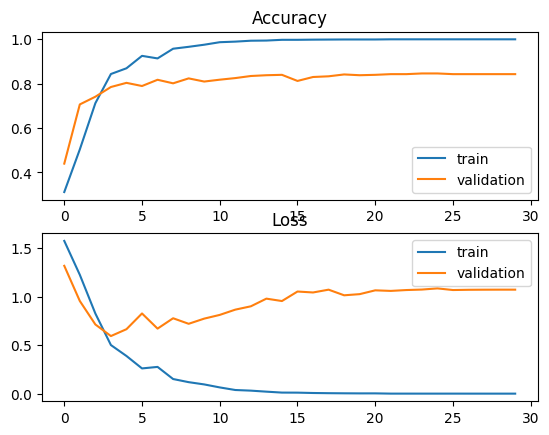

In [22]:
plt.subplot(2, 1, 1)
plt.title('Accuracy')
plt.plot(train_history, label='train')
plt.plot(val_history, label='validation')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(train_loss_history, label='train')
plt.plot(val_loss_history, label='validation')
plt.legend()
plt.show()

In [23]:
model.eval()
test_acc = 0.0
y_pred = []
y_test = []
with torch.no_grad():
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
        y_test = np.hstack((y_test, label.cpu().numpy()))
        y_pred = np.hstack((y_pred, torch.max(out, 1)[1].cpu().numpy()))
print("test acc {}".format(test_acc / (batch_id+1)))

  0%|          | 0/12 [00:00<?, ?it/s]

test acc 0.8371025219298245


In [24]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[261  13  33   9   1]
 [ 11 123   9   2   2]
 [ 18   4 119   5   0]
 [  5   3   5  99   0]
 [  0   1   0   0  19]]
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       317
         1.0       0.85      0.84      0.85       147
         2.0       0.72      0.82      0.76       146
         3.0       0.86      0.88      0.87       112
         4.0       0.86      0.95      0.90        20

    accuracy                           0.84       742
   macro avg       0.84      0.86      0.85       742
weighted avg       0.84      0.84      0.84       742

0.8476262229661033


In [25]:
reverse_label = {}
for k, v in label_dict.items():
    reverse_label[v] = k

In [26]:
def predict(predict_sentence):
    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tk, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        logits=out[0]
        logits = logits.detach().cpu().numpy()
        pred = np.argmax(logits)
        print(f'>> 분류 결과 : {reverse_label[pred]}')

In [27]:
predict("tokenization은 어떤 역할을 하나요?")

>> 분류 결과 : 이론


In [28]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 이론


In [29]:
predict('for i in range(10)')

>> 분류 결과 : 코드2


In [30]:
predict('<a href="www.google.com"> Google </a>')

>> 분류 결과 : 웹


In [31]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 이론


In [32]:
predict("엔 그램 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 이론


In [33]:
predict("N-Gram 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 코드2


In [34]:
predict('N-Gram의 개념이 뭔가요?')

>> 분류 결과 : 이론


In [35]:
predict("출석 요청드립니다.")

>> 분류 결과 : 시스템 운영


In [ ]:
# save_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/save_model/'
# torch.save(model, save_path + 'v4_kobert_200_0.8445_drop_x.pt')